# Posttest 3

File ipynb ini berguna untuk menganalisis dan melakukan preprocessing pada dataset [Penguins Binary Classification](https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification).

---

## Importing Library

Library yang digunakan pada file ini adalah pandas, matloplib, dan seaborn.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

---
## Menampilkan Data
Menggunakan ```df``` sebagai variabel untuk menyimpan file csv, lalu menggunakan ```head()``` untuk melihat 5 record teratas di csv.

In [4]:
df = pd.read_csv('penguins_binary_classification.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


---
## Menganalisis Data

### Describe
```describe()``` berguna untuk menampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari data yang bernilai numerik.

In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693,2008.043796
std,5.195566,2.013410,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.500000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000



### 10 Data Numerik Pertama
Menggunakan ```head(10)``` untuk menampilkan 10 record dari data, ```select_dtypes(include=['number'])``` untuk memilih tipe data numerik untuk ditampilkan.

In [6]:
df.head(10).select_dtypes(include=['number'])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
3,36.7,19.3,193.0,3450.0,2007
4,39.3,20.6,190.0,3650.0,2007
5,38.9,17.8,181.0,3625.0,2007
6,39.2,19.6,195.0,4675.0,2007
7,34.1,18.1,193.0,3475.0,2007
8,42.0,20.2,190.0,4250.0,2007
9,37.8,17.1,186.0,3300.0,2007


### Informasi Dataset
```info()``` berguna untuk menampilkan informasi dari dataset. Terlihat di ```RangeIndex``` terdapat 274 record, ```Data columns``` memperlihatkan jumlah dari attribute, bisa juga dilihat nama nama dari attributenya, dan ```dtypes``` memperlihatkan jenis jenis tipe data yang ada di dataset, jadi ada 5 attribute dengan tipe angka ```4 float dan 1 int```.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


### Label Attribute
Menampilkan jumlah label dari atribut yang bernilai object dengan menggunakan ```select_dtypes(include=['object'])``` untuk mengambil data yang bernilai object dan ```nuqiue()``` untuk menghitung nilai unik dari attribute. Lalu saya menampilkan juga jumlah dari label. ```display(...)``` digunakan untuk menampilkan ketiga tabel secara bersamaan.

In [8]:
display(df.select_dtypes(include=['object']).nunique())
display(df['species'].value_counts(dropna=False))
display(df['island'].value_counts(dropna=False))

,0
species,2
island,3


,count
species,
Adelie,151
Gentoo,123


,count
island,
Biscoe,167
Dream,56
Torgersen,51


### Visualisasi Dataset


#### Pie Chart
Memvisualisasikan distribusi dari spesies pinguin berdasarkan pulau yang ditempatinya.

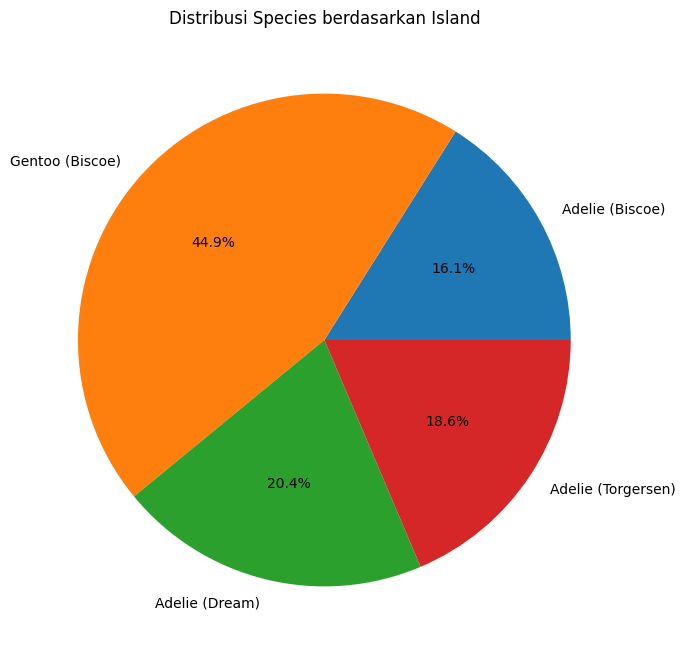

In [9]:
counts = df.groupby(['island','species']).size()
plt.figure(figsize=(8,8))
plt.pie(counts,labels=[f"{idx[1]} ({idx[0]})" for idx in counts.index],autopct='%1.1f%%')
plt.title("Distribusi Species berdasarkan Island")
plt.show()

#### Scatter Plot
Memvisualisasikan Hubungan dari panjang Flipper penguin dengan Berat badan penguin berdasarkan spesiesnya.

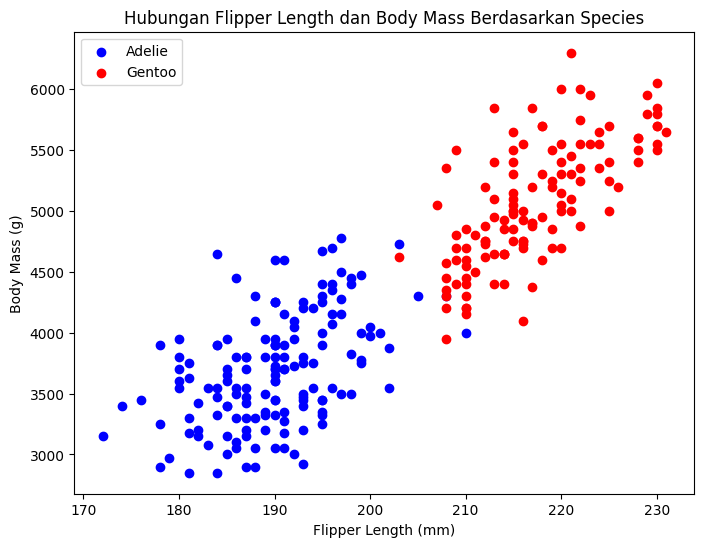

In [10]:
adelie = df.loc[df.species == 'Adelie']
gentoo = df.loc[df.species == 'Gentoo']
plt.figure(figsize=(8,6))
plt.scatter(adelie.flipper_length_mm, adelie.body_mass_g, c='blue', label='Adelie')
plt.scatter(gentoo.flipper_length_mm, gentoo.body_mass_g, c='red', label='Gentoo')
plt.title('Hubungan Flipper Length dan Body Mass Berdasarkan Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()


#### Heatmap
Memvisualisasikan korelasi dari kolom yang bernilai numerik pada dataset.

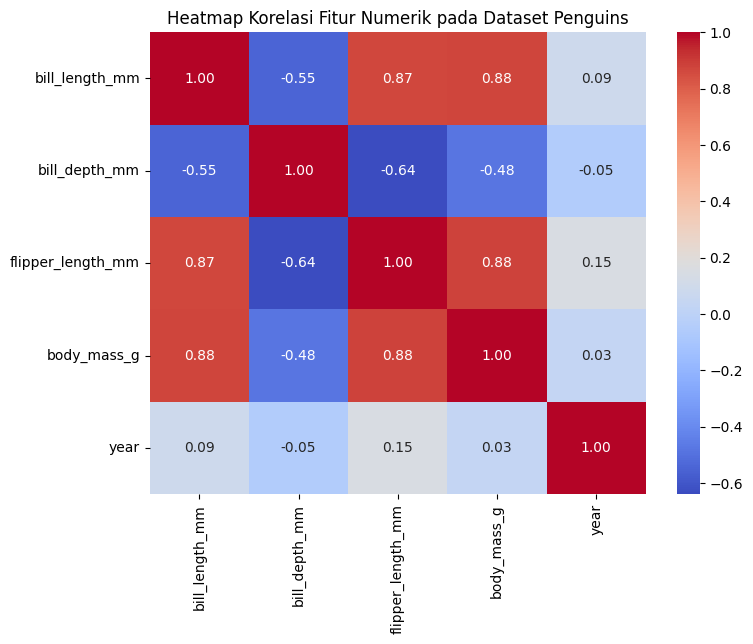

In [11]:
num_df = df.select_dtypes(include=['float64', 'int64'])
corr = num_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik pada Dataset Penguins")
plt.show()

### Kesimpulan Analisis
Berdasarkan hasil analisis data, dapat disimpulkan bahwa terdapat 2 spesies utama dalam dataset [Penguins Binary Classification](https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification). Distribusi data menunjukkan adanya variasi karakteristik pada setiap spesies, seperti perbedaan ukuran tubuh dan penyebaran di pulau tertentu. Pulau Biscoe memiliki jumlah penguin terbanyak, sedangkan Dream dan Torgersen memiliki jumlah lebih sedikit. Hal ini memberikan gambaran mengenai keragaman populasi penguin di wilayah penelitian serta potensi faktor lingkungan yang memengaruhinya.

---

## Preprocessing

Tahap *data preprocessing* bertujuan untuk mempersiapkan dataset agar siap digunakan dalam pemodelan machine learning.  
Langkah-langkah utama yang dilakukan adalah sebagai berikut:

### Data Cleaning

Proses *data cleaning* dilakukan untuk memastikan data bersih dari nilai hilang, duplikasi, dan *outlier*.  
Langkah-langkah yang dilakukan:

#### Missing Value

Deteksi dan penanganan missing value

In [12]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
year,0


#### Duplicate Value

Deteksi dan penghapusan data duplikat

In [13]:
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


#### Outlier

Deteksi dan penanganan outlier

<Axes: ylabel='bill_length_mm'>

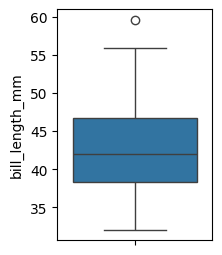

In [14]:
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(df['bill_length_mm'])

<Axes: ylabel='bill_length_mm'>

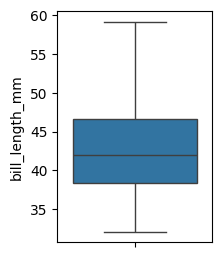

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(df['bill_length_mm'])

### Data Transformation

Mengubah data menjadi suatu format yang memudahkan dalam pengambilan keputusan dan pemanfaatan data.

#### Scalling (Normalisasi)

Kolom numerik dinormalisasi menggunakan **StandardScaler** dari scikit-learn agar setiap fitur memiliki skala distribusi yang sebanding.  
Hal ini penting karena model machine learning sangat sensitif terhadap perbedaan skala antar fitur.

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
num_col_ = [col for col in df.columns if
df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0.258661,0.666667,0.152542,0.260870,0.0
1,0.273441,0.511905,0.237288,0.275362,0.0
2,0.303002,0.583333,0.389831,0.115942,0.0
3,0.169977,0.738095,0.355932,0.173913,0.0
4,0.266051,0.892857,0.305085,0.231884,0.0


#### Encoding (Ordinal)

Kolom kategorikal dikonversi menjadi bentuk numerik menggunakan **Label Encoding**.  
Metode ini mengubah setiap kategori menjadi representasi angka unik
Langkah ini memungkinkan model untuk memahami data kategorikal.

In [17]:
encoder = OrdinalEncoder()
df["island"] = encoder.fit_transform(df[["island"]])
df['island'].value_counts(dropna=False)

,count
island,
0.0,167
1.0,56
2.0,51


### Feature Engineering

Untuk meningkatkan kemampuan model, ditambahkan satu fitur baru hasil rekayasa.  
Fitur ini menggambarkan proporsi massa tubuh terhadap panjang sirip yang mungkin memiliki pengaruh terhadap spesies penguin.

In [18]:
if 'body_mass_g' in df.columns and 'flipper_length_mm' in df.columns:
    df['body_ratio'] = df['body_mass_g'] / (df['flipper_length_mm'] + 1e-9)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    float64
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    float64
 7   body_ratio         274 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.3+ KB


### Data Splitting

Dataset dibagi menjadi dua bagian yaitu train set dan test set.  
Proses pembagian data menggunakan fungsi `train_test_split` dari scikit-learn dengan `random_state=42` agar hasilnya dapat direproduksi.  
Pembagian dilakukan secara **stratified**, artinya proporsi kelas target tetap seimbang di kedua subset.

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Dimensi X train: ', X_train.shape)
print('Dimensi X test: ', X_test.shape)
print('Dimensi y train: ', y_train.shape)
print('Dimensi y test: ', y_test.shape)

Dimensi X train:  (219, 7)
Dimensi X test:  (55, 7)
Dimensi y train:  (219,)
Dimensi y test:  (55,)
